**Project: Covid 19 data analysis using Python(Only Prediction for Bangladesh)** <br>
**Name:  [Md. Zobayer Ibna Kabir](https://github.com/ZobayerAkib)**

#**Drive Mount**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Important Libraries Loading**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier


#**Data Load**

In [ ]:
DATA_PATH = '/content/drive/MyDrive/data/Data Analyst/covid.csv'
df = pd.read_csv(DATA_PATH)

In [ ]:
df.shape

(19496, 32)

In [ ]:
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')

In [ ]:
df.location.value_counts()

location
Sweden            146
Canada            146
United States     146
Lithuania         146
Brazil            146
                 ... 
Yemen              45
Western Sahara     29
Tajikistan         24
Comoros            23
Lesotho            10
Name: count, Length: 212, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19496 entries, 0 to 19495
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         19432 non-null  object 
 1   location                         19496 non-null  object 
 2   date                             19496 non-null  object 
 3   total_cases                      19496 non-null  int64  
 4   new_cases                        19496 non-null  int64  
 5   total_deaths                     19496 non-null  int64  
 6   new_deaths                       19496 non-null  int64  
 7   total_cases_per_million          19119 non-null  float64
 8   new_cases_per_million            19119 non-null  float64
 9   total_deaths_per_million         19119 non-null  float64
 10  new_deaths_per_million           19119 non-null  float64
 11  total_tests                      5164 non-null   float64
 12  new_tests         

In [ ]:
df.total_cases.describe()

count    1.949600e+04
mean     1.752634e+04
std      1.808525e+05
min      0.000000e+00
25%      5.000000e+00
50%      8.400000e+01
75%      1.135250e+03
max      5.273572e+06
Name: total_cases, dtype: float64

**Diabetes prevalence of covid 119 patient**

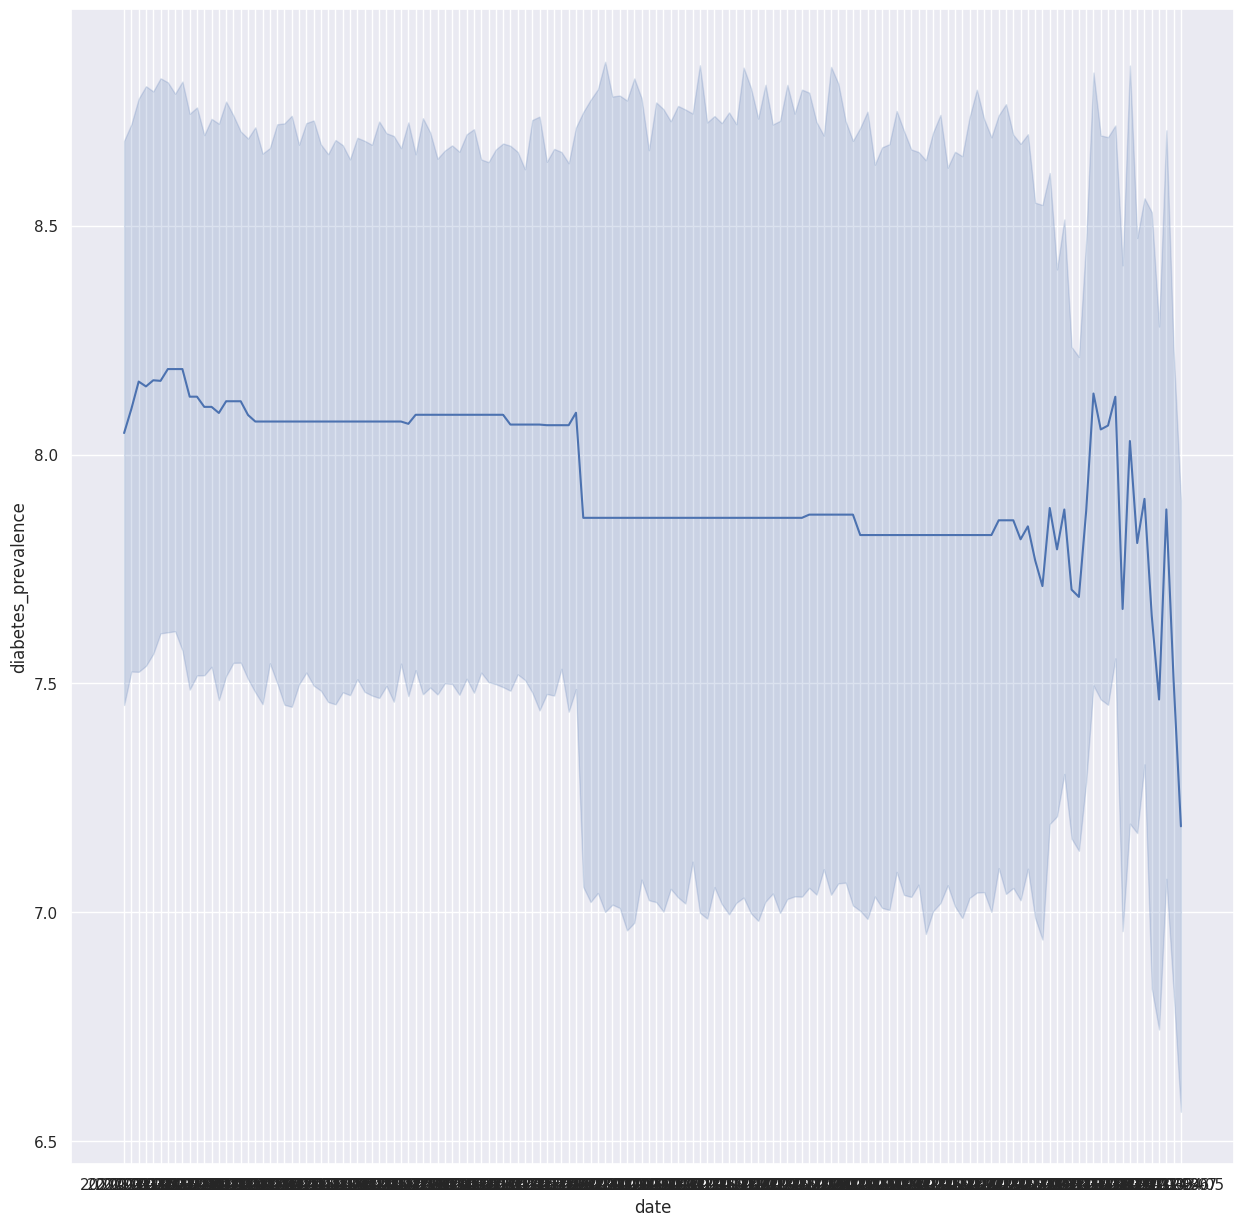

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
sns.lineplot(x="date",y="diabetes_prevalence",data=df)
plt.show()

**Top 10 location based on Total Cases**

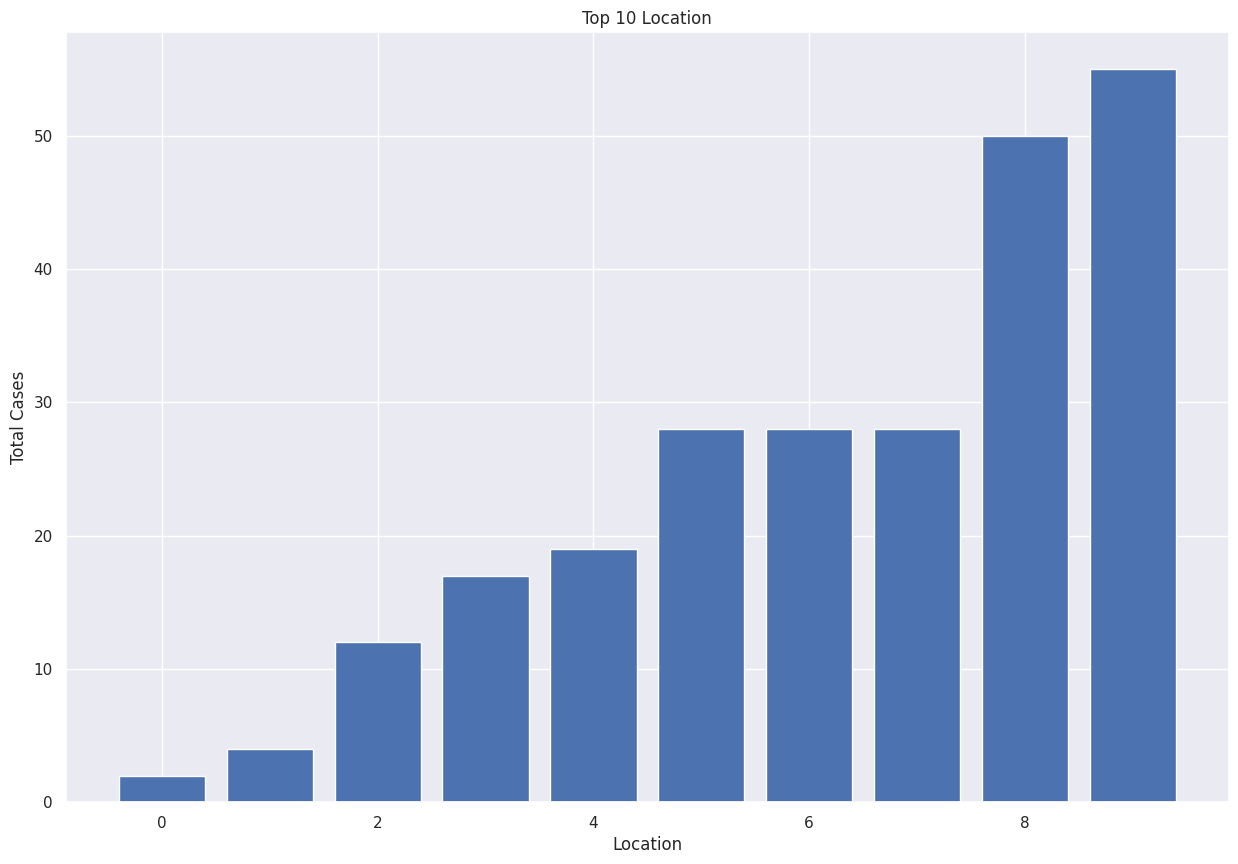

In [ ]:
plt.figure(figsize=(15,10))
x=list(df.location[0:10].index)
y=list(df.total_cases[0:10])
plt.bar(x,y)
plt.xlabel('Location')
plt.ylabel('Total Cases')
plt.title('Top 10 Location')
plt.show()



#**Bangladesh Case Analysis**

In [ ]:
Bangladesh_case=df[df['location']=='Bangladesh']

In [ ]:
Bangladesh_case.shape

(82, 32)

In [ ]:
Bangladesh_case.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
1796,BGD,Bangladesh,2020-05-20,25121,1251,370,21,152.536,7.596,2.247,...,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8
1797,BGD,Bangladesh,2020-05-21,26738,1617,386,16,162.354,9.818,2.344,...,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8
1798,BGD,Bangladesh,2020-05-22,28511,1773,408,22,173.120,10.766,2.477,...,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8
1799,BGD,Bangladesh,2020-05-23,30205,1694,432,24,183.406,10.286,2.623,...,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8
1800,BGD,Bangladesh,2020-05-24,32078,1873,452,20,194.779,11.373,2.745,...,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8


**Total cases per day in Bangladesh**

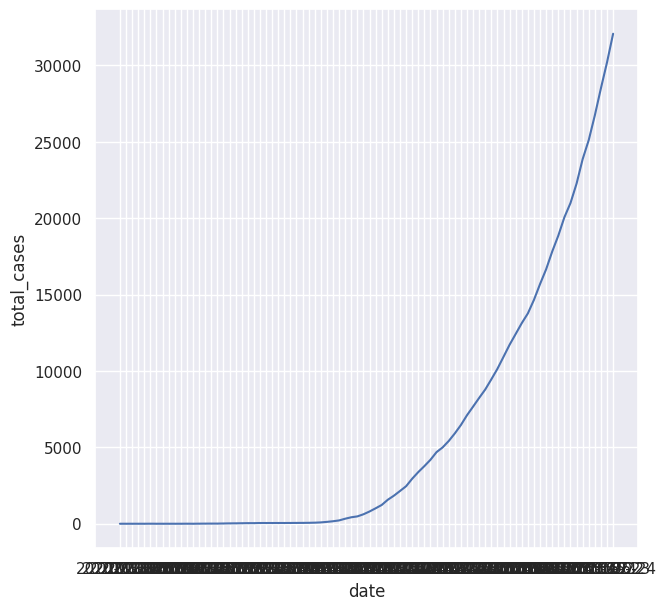

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})
sns.lineplot(x="date",y="total_cases",data=Bangladesh_case)
plt.show()

**New cases Per day in Bangladesh**

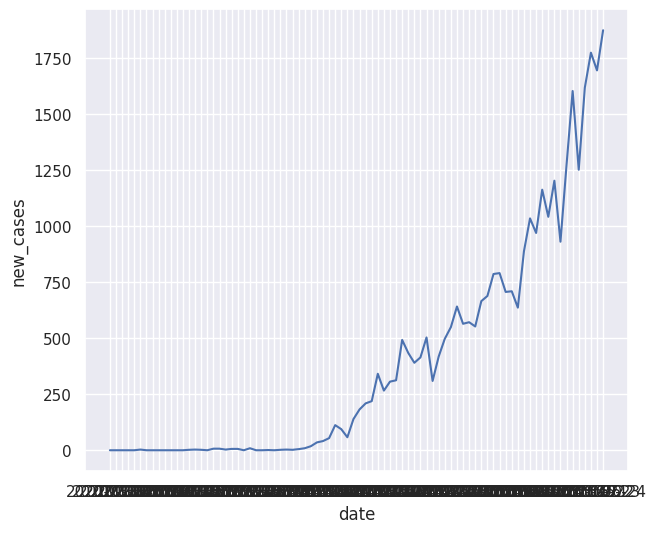

In [ ]:

sns.set(rc={'figure.figsize':(7,6)})
sns.lineplot(x="date",y="new_cases",data=Bangladesh_case)
plt.show()

**Total Deaths per day in Bangladesh**

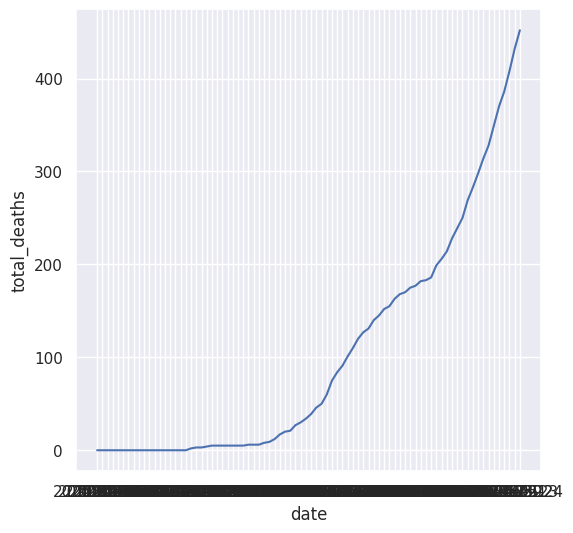

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
sns.lineplot(x="date",y="total_deaths",data=Bangladesh_case)
plt.show()

**New Deaths per day in Bangladesh**

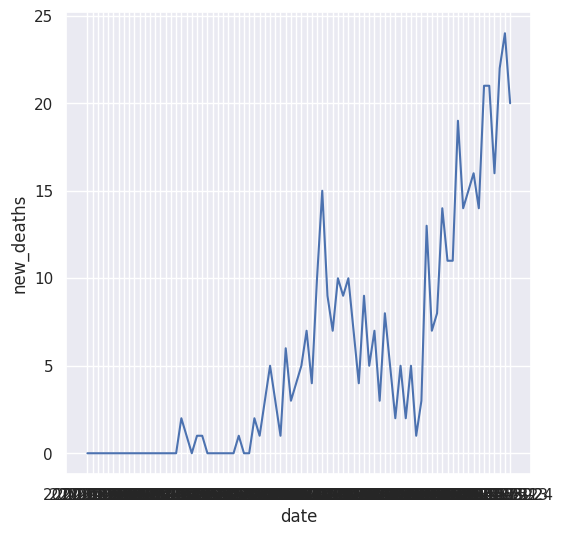

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
sns.lineplot(x="date",y="new_deaths",data=Bangladesh_case)
plt.show()

**Total cases per million in Bangladesh**

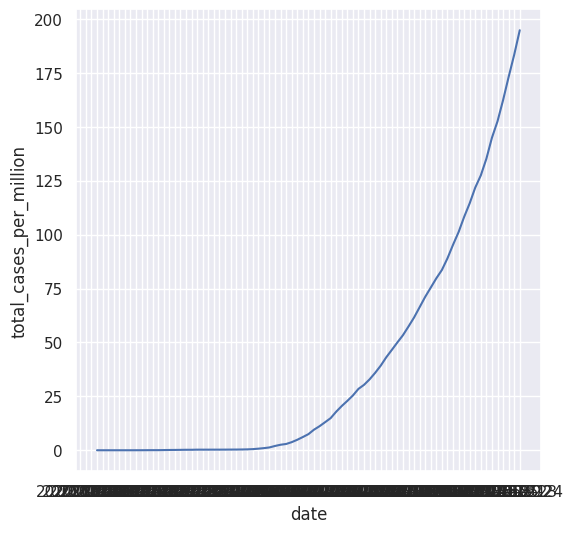

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
sns.lineplot(x="date",y="total_cases_per_million",data=Bangladesh_case)
plt.show()

**New cases per million in Bangladesh**

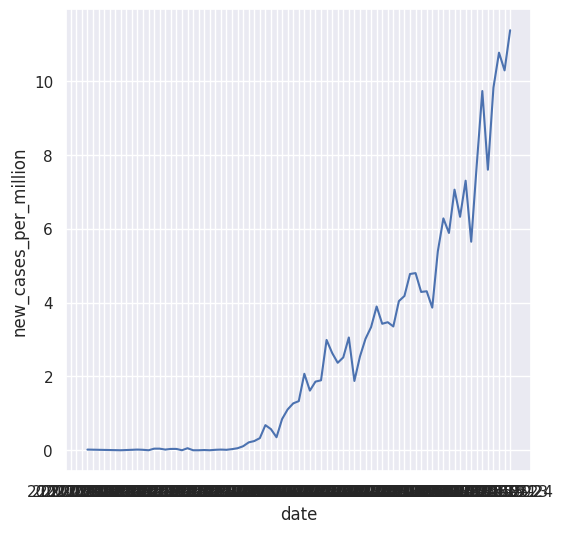

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
sns.lineplot(x="date",y="new_cases_per_million",data=Bangladesh_case)
plt.show()


**Older than 65 years age**

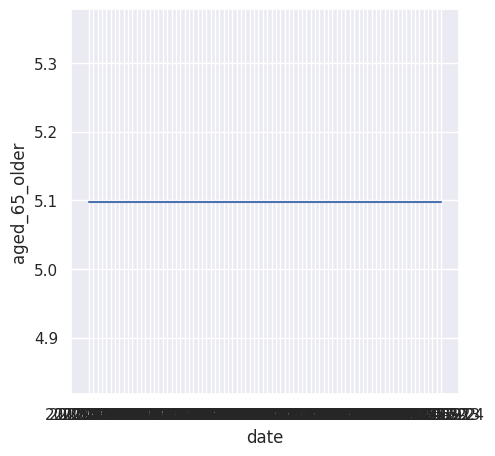

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.lineplot(x="date",y="aged_65_older",data=Bangladesh_case)
plt.show()

**Older than 70 years age**

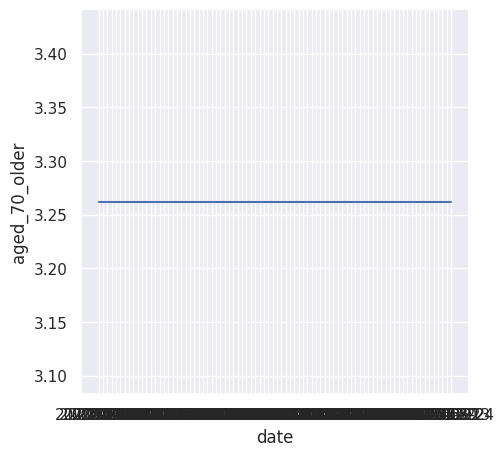

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.lineplot(x="date",y="aged_70_older",data=Bangladesh_case)
plt.show()

Diabetes Prevalence for Bangladesh

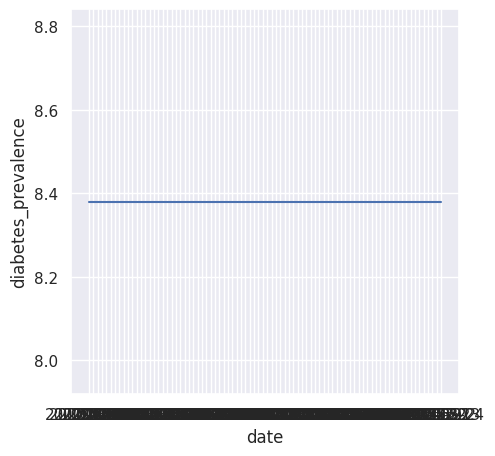

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.lineplot(x="date",y="diabetes_prevalence",data=Bangladesh_case)
plt.show()

**In Bangladesh, Diabetes played vital role in covid 19 times**

**Total Cases Based on Location And Date**

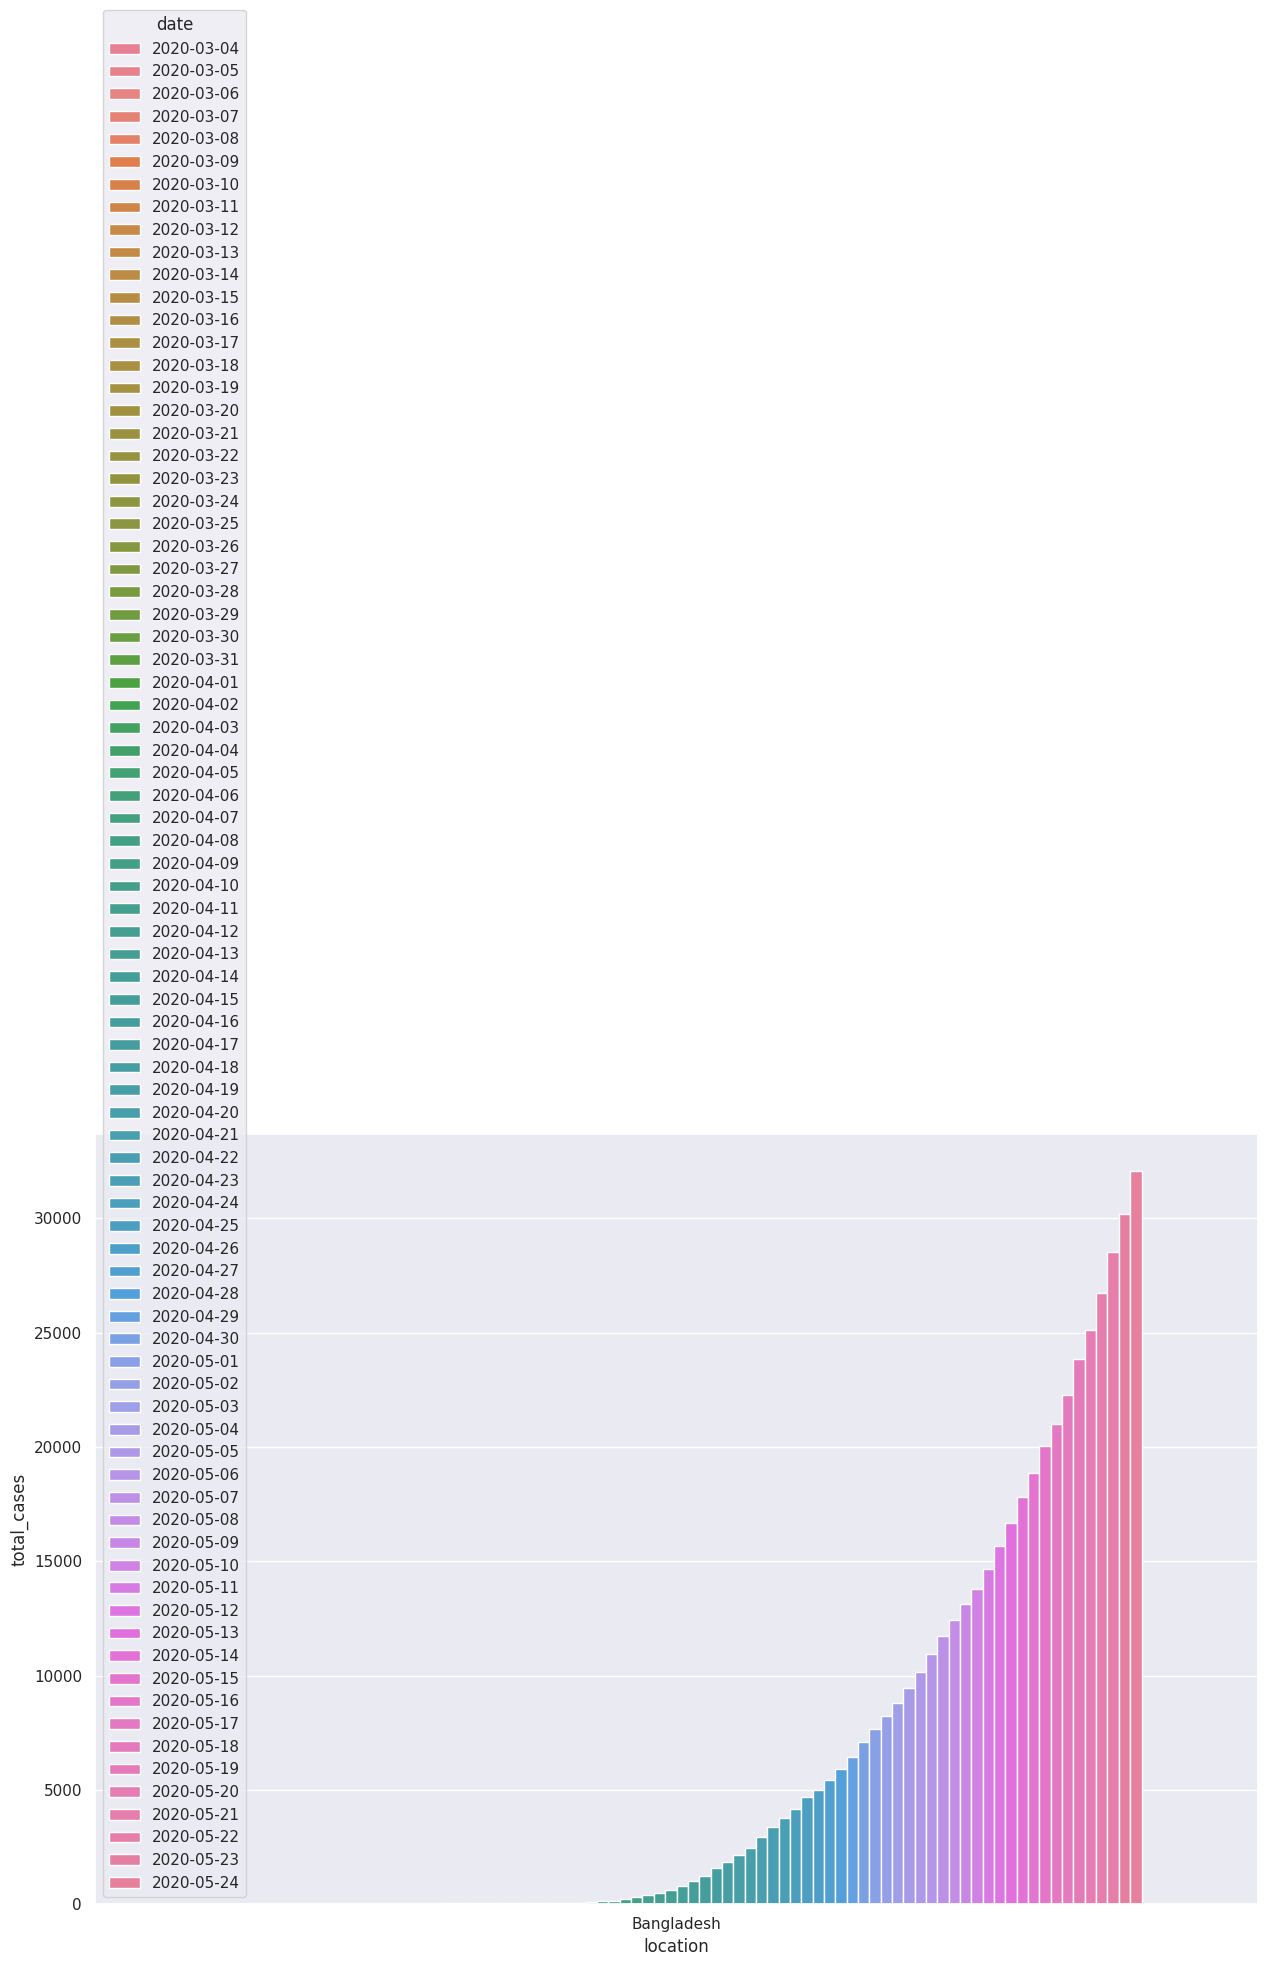

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="location",y="total_cases",data=Bangladesh_case,hue="date")
plt.show()

**Train Test Spilt**

In [ ]:
import datetime as dt
Bangladesh_case['date'] = pd.to_datetime(Bangladesh_case['date'])
Bangladesh_case['date']=Bangladesh_case['date'].map(dt.datetime.toordinal)
Bangladesh_case.head()

<ipython-input-62-f23ef2f1ea51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bangladesh_case['date'] = pd.to_datetime(Bangladesh_case['date'])
<ipython-input-62-f23ef2f1ea51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bangladesh_case['date']=Bangladesh_case['date'].map(dt.datetime.toordinal)


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
1719,BGD,Bangladesh,737488,0,0,0,0,NaN,NaN,NaN,...,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8
1720,BGD,Bangladesh,737489,0,0,0,0,NaN,NaN,NaN,...,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8
1721,BGD,Bangladesh,737490,0,0,0,0,NaN,NaN,NaN,...,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8
1722,BGD,Bangladesh,737491,0,0,0,0,NaN,NaN,NaN,...,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8
1723,BGD,Bangladesh,737492,0,0,0,0,NaN,NaN,NaN,...,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(Bangladesh_case['date'],Bangladesh_case['total_cases'],test_size=0.35,random_state=42)

In [ ]:

print('Number of rows in the total set: {}'.format(Bangladesh_case.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 82
Number of rows in the training set: 53
Number of rows in the test set: 29


#**Model Pipeline**

In [ ]:
lr = LinearRegression()
lr.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [ ]:
Bangladesh_case.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
1796,BGD,Bangladesh,737565,25121,1251,370,21,152.536,7.596,2.247,...,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8
1797,BGD,Bangladesh,737566,26738,1617,386,16,162.354,9.818,2.344,...,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8
1798,BGD,Bangladesh,737567,28511,1773,408,22,173.120,10.766,2.477,...,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8
1799,BGD,Bangladesh,737568,30205,1694,432,24,183.406,10.286,2.623,...,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8
1800,BGD,Bangladesh,737569,32078,1873,452,20,194.779,11.373,2.745,...,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8


In [ ]:
y_pred=lr.predict(np.array(X_test).reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(X_test,y_pred)

536298547099.31134

#**Prediction**

In [ ]:
lr.predict(np.array([[737570]]))

array([[19574.74962798]])